In [101]:
import pandas as pd
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error

from warnings import filterwarnings
filterwarnings('ignore')
# custom_palette = ['#2F1847',  '#C62E65']

In [102]:
df=pd.read_csv('./HR_DATASET.csv')

In [103]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [104]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Age,917.0,36.938931,8.984981,18.0,30.0,36.0,43.0,60.0
DailyRate,917.0,785.711014,401.902148,102.0,444.0,772.0,1141.0,1498.0
DistanceFromHome,917.0,9.294438,8.092566,1.0,2.0,7.0,14.0,29.0
Education,917.0,2.921483,1.020717,1.0,2.0,3.0,4.0,5.0
EmployeeCount,917.0,1.000000,0.000000,1.0,1.0,1.0,1.0,1.0
EmployeeNumber,917.0,1413.466739,388.606884,1.0,1084.0,1425.0,1737.0,2068.0
EnvironmentSatisfaction,917.0,2.738277,1.103382,1.0,2.0,3.0,4.0,4.0
HourlyRate,917.0,66.231189,20.237536,30.0,49.0,66.0,84.0,100.0
JobInvolvement,917.0,2.721919,0.720936,1.0,2.0,3.0,3.0,4.0
JobLevel,917.0,2.044711,1.100400,1.0,1.0,2.0,3.0,5.0


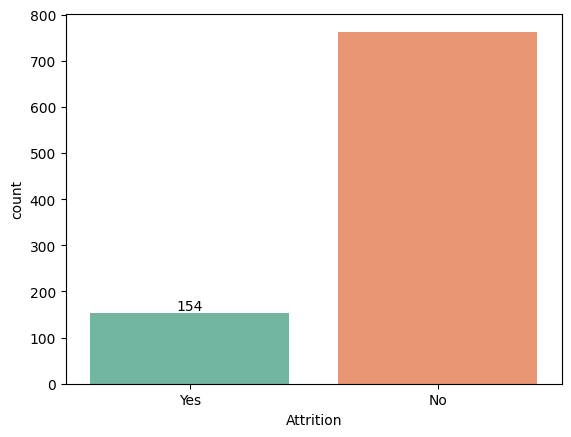

In [105]:
ax=sns.countplot(data=df,x='Attrition',palette='Set2')
ax.bar_label(ax.containers[0])
plt.show()

<Axes: xlabel='Attrition', ylabel='YearsAtCompany'>

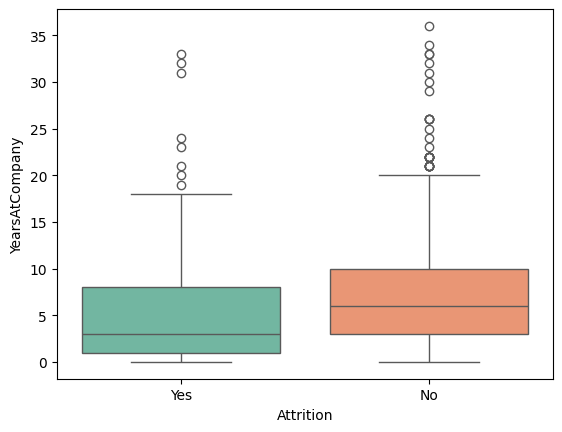

In [106]:
sns.boxplot(data=df,x='Attrition',y='YearsAtCompany',palette='Set2')

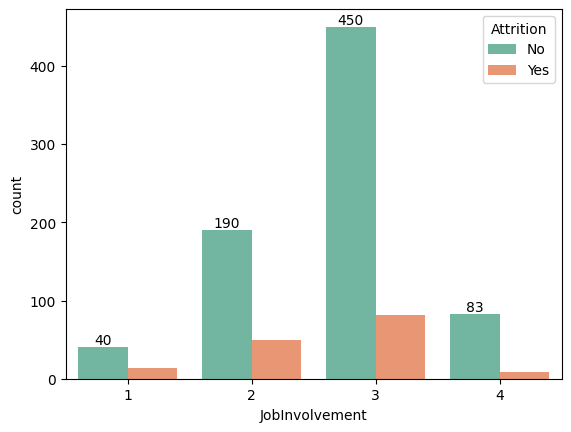

In [107]:
ax=sns.countplot(data=df,x='JobInvolvement',palette='Set2',hue='Attrition')
ax.bar_label(ax.containers[0])
plt.show()